In [1]:
# Import necessary modules

import sys
import os

# Set root folder to project root
os.chdir(os.path.dirname(os.getcwd()))

# Add root folder to path
sys.path.append(os.getcwd())

import numpy as np
import torch

from src.utils.loading import get_mazes, load_model
from src.utils.tda import get_diagram, get_betti_nums
from src.utils.plotting import plot_mazes, plot_residuals, plot_latents, plot_diagram

Using device: cuda
Loaded dt_net to cuda
latents.shape=torch.Size([400, 1, 128, 44, 44])


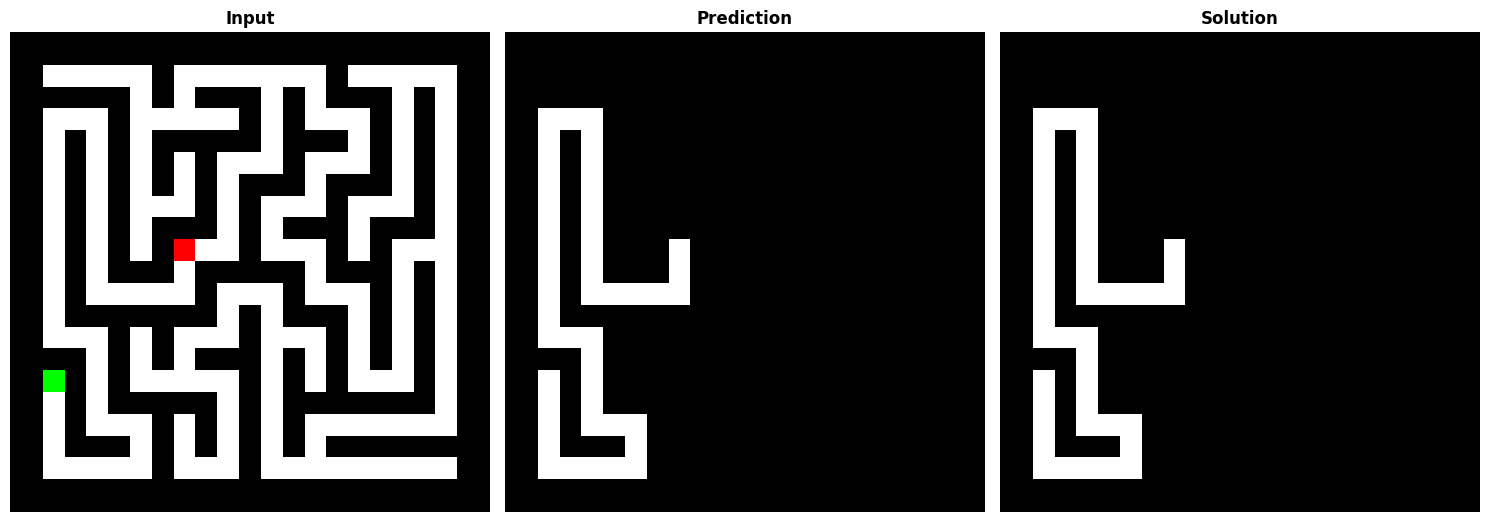

In [2]:
# Load model and mazes

model = load_model('dt_net')
maze_size = 19
maze_idx = 25
start_idx = 3001
end_idx = 3400
iters = list(range(start_idx, end_idx+1))

inputs, solutions = get_mazes(
    dataset='maze-dataset', 
    maze_size=maze_size, 
    num_mazes=100,
    percolation=0.0,
    deadend_start=True)

# Get latent series
input = inputs[maze_idx:maze_idx+1]
solution = solutions[maze_idx:maze_idx+1]
latents = model.input_to_latent(input)
latents = model.latent_forward(latents, input, iters=iters)
output = model.latent_to_output(latents[-1])
prediction = model.output_to_prediction(output, input)

plot_mazes(input, prediction, solution)

print(f'{latents.shape=}')

max(residuals) = 2.6917362


max_norm = 22.19
max_entry = 0.48
latents.reshape(latents.shape[0], -1)[0,:10] = tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
latents.reshape(latents.shape[0], -1)[-1,:10] = tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')


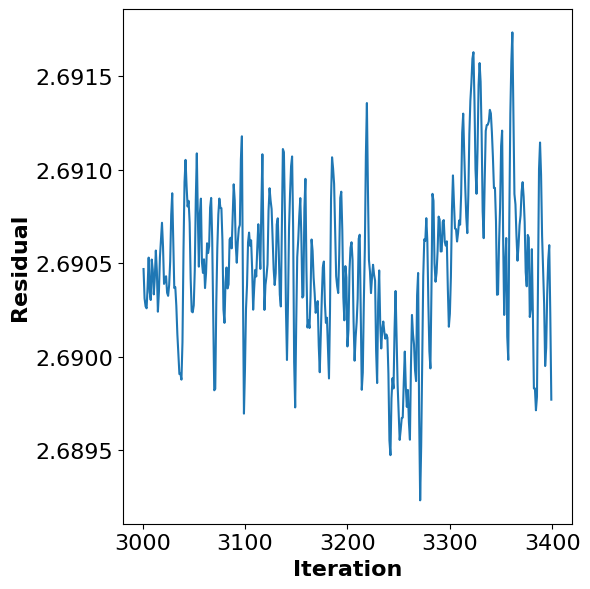

In [3]:
plot_residuals(latents, start_idx=start_idx, fig_size=(6,6), font_size=16, file_name=f'outputs/residuals/{model.name()}_size-{maze_size}_idx-{maze_idx}');
# latents.shape = (400, 1, 128, 44, 44)
max_norm = torch.max(torch.norm(latents.reshape(latents.shape[0], -1), dim=1)).item()
max_entry = torch.max(torch.abs(latents)).item()
print(f'{max_norm = :.2f}')
print(f'{max_entry = :.2f}')
print(f'{latents.reshape(latents.shape[0], -1)[0,:10] = }')
print(f'{latents.reshape(latents.shape[0], -1)[-1,:10] = }')


In [4]:
%matplotlib notebook
#plot_latents(latents, animate=True, duration=10, skip_frames=8, fig_size=(8, 8), file_name=f'{model.name()}_size-{maze_size}_idx-{maze_idx}')
plot_latents(latents, animate=False, fig_size=(8, 8), font_size=12, file_name=f'outputs/pca/{model.name()}_size-{maze_size}_idx-{maze_idx}')


X[:5] = array([[-1.3451433e+00, -1.6299348e-03, -8.5891027e-04],
       [ 1.3450541e+00,  7.4729446e-04,  1.5520246e-03],
       [-1.3449860e+00,  5.4121035e-04, -1.6691006e-03],
       [ 1.3450117e+00, -1.7703966e-03,  8.6385151e-04],
       [-1.3449759e+00,  2.0282376e-03,  3.6655460e-04]], dtype=float32)
X[-5:] = array([[ 1.3450713e+00,  6.9366436e-04,  1.6890853e-03],
       [-1.3451772e+00,  6.2492164e-04, -1.9854021e-03],
       [ 1.3451490e+00, -1.8493239e-03,  1.3086472e-03],
       [-1.3448073e+00,  2.2564796e-03, -6.6215573e-05],
       [ 1.3446909e+00, -1.7158890e-03, -1.2316382e-03]], dtype=float32)


<IPython.core.display.Javascript object>

In [5]:
threshold = 0.2

    Performing TDA with embed_dim = 0, delay = 1, and X.shape = (400, 1, 128, 44, 44) (0.396GB)
    Flattened X.shape = (400, 247808)
    Reduced X.shape = (400, 400) (0.001GB)
    Computed distance_matrix.shape = (400, 400) with max_distance = 2.692
betti_nums = array([2, 0])


<IPython.core.display.Javascript object>

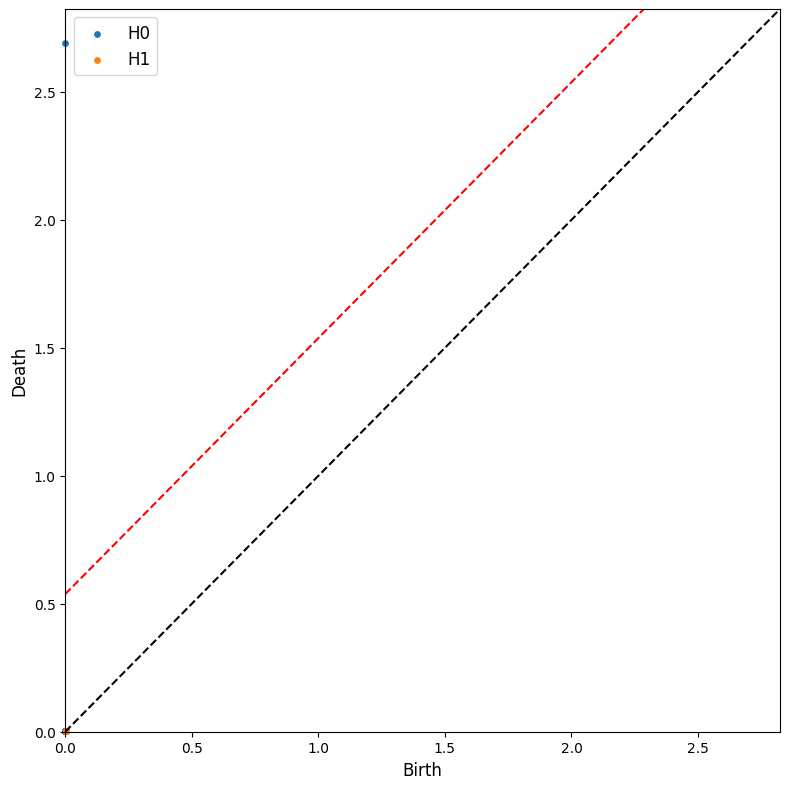

In [6]:
diagram, _ = get_diagram(latents,
                         embed_dim=0,
                         max_homo=1,
                         delay=1)
betti_nums = get_betti_nums(diagram, threshold=threshold)
print(f'{betti_nums = }')
plot_diagram(diagram, threshold=threshold)

    Performing TDA with embed_dim = 0, delay = 1, and X.shape = (400, 1, 128, 44, 44) (0.396GB)
    Flattened X.shape = (400, 247808)
    Reduced X.shape = (400, 400) (0.001GB)
    Computed distance_matrix.shape = (400, 400) with max_distance = 2.692
betti_nums = array([2, 0])


<IPython.core.display.Javascript object>

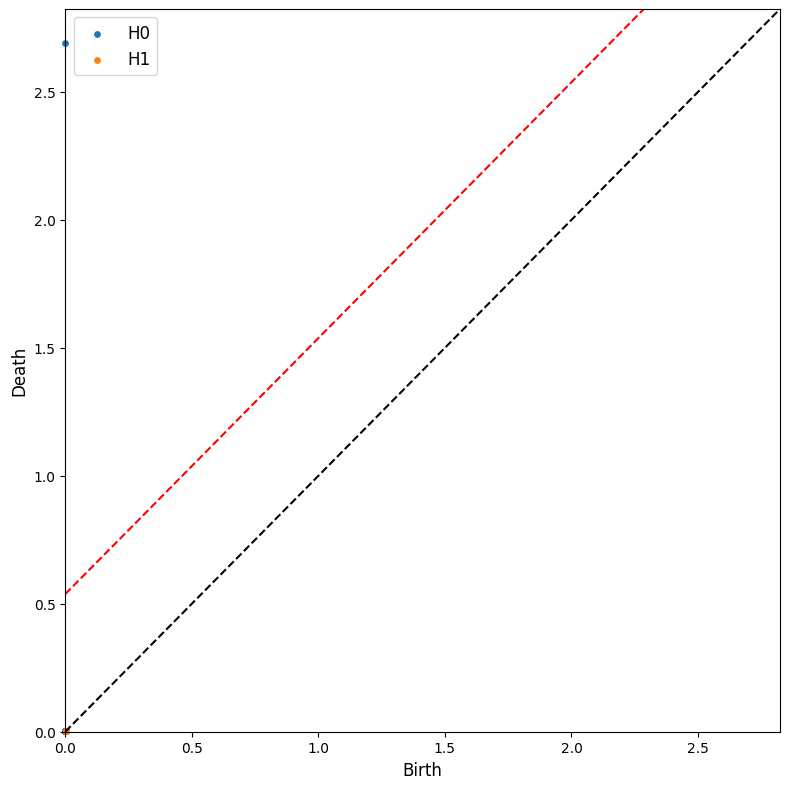

In [7]:
diagram, _ = get_diagram(latents,
                         dtype=np.float32)
betti_nums = get_betti_nums(diagram, threshold=threshold)
print(f'{betti_nums = }')
plot_diagram(diagram, threshold=threshold)